In [ ]:
import numpy as np
import plotly.graph_objects as go

# Parameters
r = 5.50423
k = 0.73936
q = 0.75533
D = 0.05282
c = 3.3940
A = 2.6581
a = 0.32059

alpha = 0.7

# Initial conditions
x0 = 0.3
y0 = 0.2
z0 = 0.5

# Time parameters
t_start = 0
t_end = 100
num_points = 1000
dt = (t_end - t_start) / (num_points - 1)

# Initialize arrays
t_values = np.linspace(t_start, t_end, num_points)
x = np.zeros(num_points)
y = np.zeros(num_points)
z = np.zeros(num_points)
x[0] = x0
y[0] = y0
z[0] = z0

# Numerical simulation using Grünwald-Letnikov definition
for i in range(1, num_points):
    x_derivative = r * x[i-1] * (1 - x[i-1] / k) - (q * x[i-1] * y[i-1] / (x[i-1] + D))
    y_derivative = -c * y[i-1] + (q * x[i-1] * y[i-1] * z[i-1]) / (x[i-1] + D)
    z_derivative = A * z[i-1] - a * z[i-1] * z[i-1] - (q * x[i-1] * y[i-1] * z[i-1]) / (x[i-1] + D)

    x[i] = x[i-1] + dt * x_derivative
    y[i] = y[i-1] + dt * y_derivative
    z[i] = z[i-1] + dt * z_derivative

# Create interactive Plotly figure
fig = go.Figure()

fig.add_trace(go.Scatter(x=t_values, y=x, mode='lines', name='x = 0.02801272'))
fig.add_trace(go.Scatter(x=t_values, y=y, mode='lines', name='y = 3.488722'))
fig.add_trace(go.Scatter(x=t_values, y=z, mode='lines', name='z = 193.6321'))

fig.update_layout(
    title='Simulation of Fractional Differential Equations (Grünwald-Letnikov)',
    xaxis_title='Time',
    yaxis_title='Values',
    legend=dict(x=0.7, y=1.0)
)

fig.show()


In [ ]:
import numpy as np
import plotly.express as px

# Parameters
r = 5.50423
k = 0.73936
q = 0.75533
D = 0.05282
c = 3.3940
A = 2.6581
a = 0.32059
alpha = 0.7
# System of fractional differential equations
def fractional_derivative(y, alpha):
    return (np.diff(y) / np.diff(time_points)) ** alpha

def fractional_ode(y, t, params):
    x, y, z = y
    dxdt = r * x * (1 - x / k) - (q * x * y) / (x + D)
    dydt = -c * y + (q * x * y * z) / (x + D)
    dzdt = A * z - a * z * z - (q * x * y * z) / (x + D)
    return np.array([dxdt, dydt, dzdt])

# Time settings
t_start = 0
t_end = 1000
dt = 0.01
time_points = np.arange(t_start, t_end, dt)

# Initial conditions
y0 = np.array([0.1, 0.2, 0.3])

# Solve the fractional differential equations using Euler integration
solution = np.empty((len(time_points), 3))
solution[0] = y0

for i in range(1, len(time_points)):
    t = time_points[i]
    y_prev = solution[i - 1]
    y_new = y_prev + fractional_ode(y_prev, t, None) * dt
    solution[i] = y_new

# Extract the solution
x_vals = solution[:, 0]
y_vals = solution[:, 1]
z_vals = solution[:, 2]

# Create 3D plot using Plotly
fig = px.scatter_3d(x=x_vals, y=y_vals, z=z_vals, title='x = 0.02801272, y = 3.488722, z =  193.6321')
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go

# Parameters
r = 5.59422
k = 0.50232
q = 0.86130
D = 0.05338
c = 7.5160
A = 7.1992
a = 0.71876

# Fractional derivative order
alpha = 0.5


# Define the fractional derivative function
def fractional_derivative(t, y, alpha):
    return np.diff(y) / np.diff(t) ** alpha

# Define the system of fractional differential equations
def system(t, y):
    x, y, z = y
    dxdt = r * x * (1 - x / k) - (q * x * y / (x + D))
    dydt = -c * y + (q * x * y * z) / (x + D)
    dzdt = A * z - a * z * z - (q * x * y * z) / (x + D)
    return [dxdt, dydt, dzdt]

# Initial conditions
initial_conditions = [0.2, 0.1, 0.5]

# Time span
t_start = 0
t_end = 100
t_points = 1000
t_span = np.linspace(t_start, t_end, t_points)

# Solve the fractional differential equations
solution = solve_ivp(system, [t_start, t_end], initial_conditions, t_eval=t_span, method='RK45')

# Calculate fractional derivatives
x_prime = fractional_derivative(solution.t, solution.y[0], alpha)
y_prime = fractional_derivative(solution.t, solution.y[1], alpha)
z_prime = fractional_derivative(solution.t, solution.y[2], alpha)

# Create figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=solution.t, y=x_prime, mode='lines', name='x\''))
fig.add_trace(go.Scatter(x=solution.t, y=y_prime, mode='lines', name='y\''))
fig.add_trace(go.Scatter(x=solution.t, y=z_prime, mode='lines', name='z\''))
fig.update_layout(title=f'Fractional Derivatives (alpha={alpha})', xaxis_title='Time', yaxis_title='Value')
fig.show()


In [ ]:
fig = px.scatter(x=x_vals, y=y_vals, title='Plot of x, y')
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = px.scatter(x=y_vals, y=z_vals, title='Plot of y, z')
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = px.scatter(x=x_vals, y=z_vals, title='Plot of x, z')
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go

# Parameters
r = 2.0906
k = 0.27575
q = 0.73230
D = 0.01210
c = 9.6405
A = 7.8040
a = 0.56045

# Define the fractional derivative function
def fractional_derivative(t, y, alpha):
    return np.diff(y) / np.diff(t) ** alpha

# Define the system of fractional differential equations
def system(t, y, alpha):
    x, y, z = y
    dxdt = r * x * (1 - x / k) - (q * x * y / (x + D))
    dydt = -c * y + (q * x * y * z) / (x + D)
    dzdt = A * z - a * z * z - (q * x * y * z) / (x + D)
    return [dxdt, dydt, dzdt]

# Initial conditions
initial_conditions = [0.5, 0.5, 0.5]

# Time span
t_start = 0
t_end = 100
t_points = 1000
t_span = np.linspace(t_start, t_end, t_points)

# Range of alpha values
alpha_range = np.linspace(0.1, 1, 10)

# Create a Plotly figure
fig = go.Figure()

# Iterate through alpha values and add traces to the figure
for alpha in alpha_range:
    # Solve the fractional differential equations
    solution = solve_ivp(lambda t, y: system(t, y, alpha), [t_start, t_end], initial_conditions, t_eval=t_span, method='RK45')

    # Calculate fractional derivatives
    x_prime = fractional_derivative(solution.t, solution.y[0], alpha)
    y_prime = fractional_derivative(solution.t, solution.y[1], alpha)
    z_prime = fractional_derivative(solution.t, solution.y[2], alpha)

    # Add traces to the figure
    fig.add_trace(go.Scatter(x=solution.t, y=x_prime, mode='lines', name=f'alpha = {alpha:.2f} (x\')'))
    fig.add_trace(go.Scatter(x=solution.t, y=y_prime, mode='lines', name=f'alpha = {alpha:.2f} (y\')'))
    fig.add_trace(go.Scatter(x=solution.t, y=z_prime, mode='lines', name=f'alpha = {alpha:.2f} (z\')'))

# Update the layout and show the figure
fig.update_layout(title='Fractional Derivatives for Different alpha Values', xaxis_title='Time', yaxis_title='Value')
fig.show()


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.subplots as sp
import plotly.graph_objects as go

# Parameters
r = 2.0906
k = 0.27575
q = 0.73230
D = 0.01210
c = 9.6405
A = 7.8040
a = 0.56045

# Define the fractional derivative function
def fractional_derivative(t, y, alpha):
    return np.diff(y) / np.diff(t) ** alpha

# Define the system of fractional differential equations
def system(t, y, alpha):
    x, y, z = y
    dxdt = r * x * (1 - x / k) - (q * x * y / (x + D))
    dydt = -c * y + (q * x * y * z) / (x + D)
    dzdt = A * z - a * z * z - (q * x * y * z) / (x + D)
    return [dxdt, dydt, dzdt]

# Initial conditions
initial_conditions = [0.5, 0.5, 0.5]

# Time span
t_start = 0
t_end = 100
t_points = 1000
t_span = np.linspace(t_start, t_end, t_points)

# Range of alpha values
alpha_range = np.linspace(0.1, 1, 10)

# Create subplots
num_subplots = len(alpha_range)
fig = sp.make_subplots(rows=num_subplots, cols=1, subplot_titles=[f'alpha = {alpha:.2f}' for alpha in alpha_range])

# Iterate through alpha values and add traces to subplots
for idx, alpha in enumerate(alpha_range):
    # Solve the fractional differential equations
    solution = solve_ivp(lambda t, y: system(t, y, alpha), [t_start, t_end], initial_conditions, t_eval=t_span, method='RK45')

    # Calculate fractional derivatives
    x_prime = fractional_derivative(solution.t, solution.y[0], alpha)
    y_prime = fractional_derivative(solution.t, solution.y[1], alpha)
    z_prime = fractional_derivative(solution.t, solution.y[2], alpha)

    # Add traces to subplots
    fig.add_trace(go.Scatter(x=solution.t, y=x_prime, mode='lines', name='x\''), row=idx + 1, col=1)
    fig.add_trace(go.Scatter(x=solution.t, y=y_prime, mode='lines', name='y\''), row=idx + 1, col=1)
    fig.add_trace(go.Scatter(x=solution.t, y=z_prime, mode='lines', name='z\''), row=idx + 1, col=1)

# Update subplot layout and show the figure
fig.update_layout(title='Fractional Derivatives for Different alpha Values', showlegend=False)
fig.update_xaxes(title_text='Time', row=num_subplots, col=1)
fig.update_yaxes(title_text='Value', row=num_subplots, col=1)
fig.show()


In [ ]:
# import numpy as np
# from scipy.integrate import solve_ivp
# import matplotlib.pyplot as plt

# def fractional_diff_eq(t, y, r, k, q, D, c, A, a):
#     x, y, z = y

#     dxdt = r * x * (1 - x / k) - (q * x * y / (x + D))
#     dydt = -c * y + (q * x * y * z) / (x + D)
#     dzdt = A * z - a * z * z - (q * x * y * z) / (x + D)

#     return [dxdt, dydt, dzdt]

# # Parameters
# r = 2.0906
# k = 0.27575
# q = 0.73230
# D = 0.01210
# c = 9.6405
# A = 7.8040
# a = 0.56045

# # Initial conditions
# initial_conditions = [0.1, 0.2, 0.3]  # Initial values of x, y, z

# # Time span for simulation
# t_span = (0, 100)  # Start and end time

# # Solve the fractional differential equations
# solution = solve_ivp(
#     lambda t, y: fractional_diff_eq(t, y, r, k, q, D, c, A, a),
#     t_span,
#     initial_conditions,
#     t_eval=np.linspace(t_span[0], t_span[1], 1000)
# )

# # Extract the results
# t_values = solution.t
# x_values, y_values, z_values = solution.y

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(t_values, x_values, label='x')
# plt.plot(t_values, y_values, label='y')
# plt.plot(t_values, z_values, label='z')
# plt.xlabel('Time')
# plt.ylabel('Values')
# plt.title('Simulation of Fractional Differential Equations')
# plt.legend()
# plt.grid()
# plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Parameters
# r = 2.0906
# k = 0.27575
# q = 0.73230
# D = 0.01210
# c = 9.6405
# A = 7.8040
# a = 0.56045
# alpha = 0.9  # Fractional order

# # Initial conditions
# x0 = 0.1
# y0 = 0.2
# z0 = 0.3

# # Time parameters
# t_start = 0
# t_end = 100
# num_points = 1000
# dt = (t_end - t_start) / (num_points - 1)

# # Initialize arrays
# x = np.zeros(num_points)
# y = np.zeros(num_points)
# z = np.zeros(num_points)
# x[0] = x0
# y[0] = y0
# z[0] = z0

# # Numerical simulation using Grünwald-Letnikov definition
# for i in range(1, num_points):
#     x_derivative = r * x[i-1] * (1 - x[i-1] / k) - (q * x[i-1] * y[i-1] / (x[i-1] + D))
#     y_derivative = -c * y[i-1] + (q * x[i-1] * y[i-1] * z[i-1]) / (x[i-1] + D)
#     z_derivative = A * z[i-1] - a * z[i-1] * z[i-1] - (q * x[i-1] * y[i-1] * z[i-1]) / (x[i-1] + D)

#     x[i] = x[i-1] + dt * x_derivative
#     y[i] = y[i-1] + dt * y_derivative
#     z[i] = z[i-1] + dt * z_derivative

# # Plot the results
# t_values = np.linspace(t_start, t_end, num_points)
# plt.figure(figsize=(10, 6))
# plt.plot(t_values, x, label='x')
# plt.plot(t_values, y, label='y')
# plt.plot(t_values, z, label='z')
# plt.xlabel('Time')
# plt.ylabel('Values')
# plt.title('Simulation of Fractional Differential Equations (Grünwald-Letnikov)')
# plt.legend()
# plt.grid()
# plt.show()


<ipython-input-6-716bd7f156d5>:42: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-6-716bd7f156d5>:43: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-6-716bd7f156d5>:41: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-6-716bd7f156d5>:41: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-6-716bd7f156d5>:42: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-6-716bd7f156d5>:43: RuntimeWarning:

invalid value encountered in double_scalars



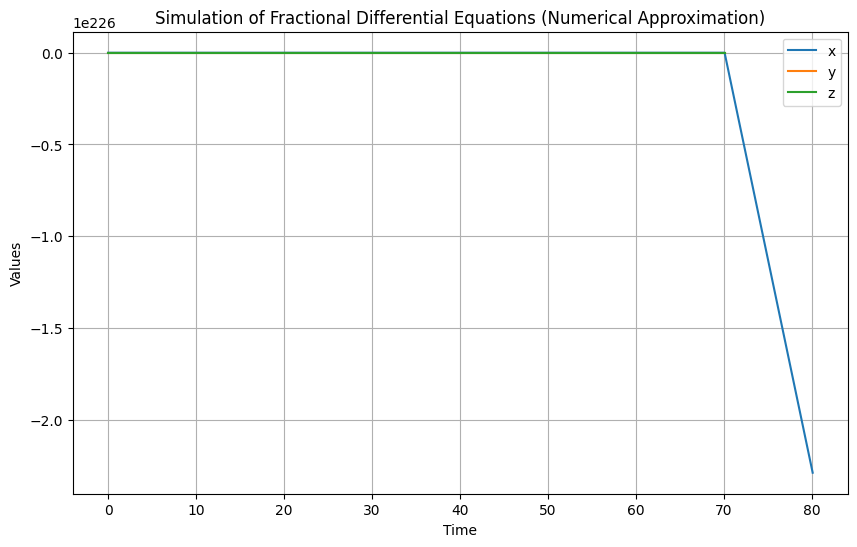

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 2.0906
k = 0.27575
q = 0.73230
D = 0.01210
c = 9.6405
A = 7.8040
a = 0.56045
alpha = 0.931  # Fractional order

# Initial conditions
x0 = 0.1
y0 = 0.1
z0 = 0.1

# Time parameters
t_start = 0
t_end = 10000
num_points = 1000
dt = (t_end - t_start) / (num_points - 1)

# Initialize arrays
x_values = np.zeros(num_points)
y_values = np.zeros(num_points)
z_values = np.zeros(num_points)
x_values[0] = x0
y_values[0] = y0
z_values[0] = z0

# Numerical simulation using numerical differentiation
for i in range(1, num_points):
    # Calculate fractional derivatives approximately using numerical differentiation
    caputo_dx_value = (x_values[i-1] - x_values[i-2]) / dt
    caputo_dy_value = (y_values[i-1] - y_values[i-2]) / dt
    caputo_dz_value = (z_values[i-1] - z_values[i-2]) / dt

    # Update values using the fractional derivatives
    x_values[i] = x_values[i-1] + dt * (r * x_values[i-1] * (1 - x_values[i-1] / k) - (q * x_values[i-1] * y_values[i-1] / (x_values[i-1] + D)) - caputo_dx_value)
    y_values[i] = y_values[i-1] + dt * (-c * y_values[i-1] + (q * x_values[i-1] * y_values[i-1] * z_values[i-1]) / (x_values[i-1] + D) - caputo_dy_value)
    z_values[i] = z_values[i-1] + dt * (A * z_values[i-1] - a * z_values[i-1] * z_values[i-1] - (q * x_values[i-1] * y_values[i-1] * z_values[i-1]) / (x_values[i-1] + D) - caputo_dz_value)

# Plot the results
t_values = np.linspace(t_start, t_end, num_points)
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.plot(t_values, z_values, label='z')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Simulation of Fractional Differential Equations (Numerical Approximation)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go

# Parameters
r = 5.59422
k = 0.50232
q = 0.86130
D = 0.05338
c = 7.5160
A = 7.1992
a = 0.71876

# System of fractional differential equations
def system(t, y):
    x, y, z = y
    dxdt = r * x * (1 - x / k) - (q * x * y / (x + D))
    dydt = -c * y + (q * x * y * z) / (x + D)
    dzdt = A * z - a * z * z - (q * x * y * z) / (x + D)
    return [dxdt, dydt, dzdt]

# Initial conditions
initial_conditions = [0.7, 0.1, 0.5]

# Time span for simulation
t_span = (0, 1000)

# Fractional order for derivative (a)
alpha = 0.6




# Solve the fractional differential equations
solution = solve_ivp(system, t_span, initial_conditions, method='RK45', t_eval=np.linspace(*t_span, 1000))
# Extract results
t = solution.t
x = solution.y[0]
y = solution.y[1]
z = solution.y[2]

# Create Plotly figure
fig = go.Figure()

# Add traces for x, y, and z
fig.add_trace(go.Scatter(x=t, y=x, mode='lines', name='x'))
fig.add_trace(go.Scatter(x=t, y=y, mode='lines', name='y'))
fig.add_trace(go.Scatter(x=t, y=z, mode='lines', name='z'))

# Update layout
fig.update_layout(title='Fractional Differential Equations Simulation',
                  xaxis_title='Time',
                  yaxis_title='Value')

# Show the plot
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go
from scipy.integrate import solve_ivp

# Parameters
r = 5.59422
k = 0.50232
q = 0.86130
D = 0.05338
c = 7.5160
A = 7.1992
a = 0.71876
alpha = 0.2

  # Order of the fractional derivative

# System of fractional differential equations
def fractional_derivatives(t, u):
    x, y, z = u
    dxdt = r*x*(1 - x/k) - (q*x*y)/(x + D)
    dydt = -c*y + (q*x*y*z)/(x + D)
    dzdt = A*z - a*z*z - (q*x*y*z)/(x + D)
    return [dxdt, dydt, dzdt]

# Initial conditions
initial_conditions = [0.1, 0.2, 0.3]

# Time span
t_span = (0, 1000)

# Solve the fractional differential equations using numerical solver
solution = solve_ivp(fractional_derivatives, t_span, initial_conditions, method='RK45')

# Extract solution
t = solution.t
x_sol = solution.y[0]
y_sol = solution.y[1]
z_sol = solution.y[2]

# Create Plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=x_sol, mode='lines', name='x'))
fig.add_trace(go.Scatter(x=t, y=y_sol, mode='lines', name='y'))
fig.add_trace(go.Scatter(x=t, y=z_sol, mode='lines', name='z'))

fig.update_layout(title=f'Simulation of Fractional Differential Equations (Order {alpha})',
                  xaxis_title='Time',
                  yaxis_title='Value')

# Show the plot
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go
from scipy.integrate import solve_ivp

# Parameters
r = 5.59422
k = 0.50232
q = 0.86130
D = 0.05338
c = 7.5160
A = 7.1992
a = 0.71876
alpha = 0.9  # Order of the fractional derivative

# System of fractional differential equations
def fractional_derivatives(t, u):
    x, y, z = u
    dxdt = r*x*(1 - x/k) - (q*x*y/x + D)
    dydt = -c*y + (q*x*y*z)/(x + D)
    dzdt = A*z - a*z*z - (q*x*y*z)/(x + D)
    return [dxdt, dydt, dzdt]

# Initial conditions
initial_conditions = [0.1, 0.2, 0.3]

# Time span
t_span = (0, 1000)

# Solve the fractional differential equations using numerical solver
solution = solve_ivp(fractional_derivatives, t_span, initial_conditions, method='RK45')

# Extract solution
t = solution.t
x_sol = solution.y[0]
y_sol = solution.y[1]
z_sol = solution.y[2]

# Create 3D Plotly figure
fig = go.Figure(data=[go.Scatter3d(x=x_sol, y=y_sol, z=z_sol, mode='lines')])
fig.update_layout(title=f'3D Plot of Fractional Differential Equations (Order {alpha})',
                  scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='z'))

# Show the plot
fig.show()


In [1]:
import numpy as np
from scipy.special import gamma
import plotly.express as px

# Parameters
r = 5.59422
k = 0.50232
q = 0.86130
D = 0.05338
c = 7.5160
A = 7.1992
a = 0.71876
alpha = 0.5  # Order of fractional derivative

# Define the Caputo fractional derivative
def caputo_derivative(y, alpha, t, h):
    n = len(y)
    der = np.zeros_like(y)

    for i in range(n):
        sum_term = 0
        for j in range(i + 1):
            sum_term += ((-1) ** j * gamma(alpha + 1) / (gamma(j + 1) * gamma(alpha - j + 1))) * y[i - j] * (t - j * h) ** (alpha - j)
        der[i] = h ** (-alpha) * sum_term

    return der

# Time settings
t_start = 0
t_end = 10
num_points = 1000
t_values = np.linspace(t_start, t_end, num_points)
h = t_values[1] - t_values[0]

# Initial conditions
x = np.zeros(num_points)
y = np.zeros(num_points)
z = np.zeros(num_points)
x[0] = 0.5
y[0] = 0.3
z[0] = 0.2

# Simulate the fractional differential equations
for i in range(1, num_points):
    dxdt = caputo_derivative(x[:i], alpha, t_values[i], h)
    dydt = caputo_derivative(y[:i], alpha, t_values[i], h)
    dzdt = caputo_derivative(z[:i], alpha, t_values[i], h)

    x[i] = dxdt[-1] + h * (r * x[i - 1] * (1 - x[i - 1] / k) - (q * x[i - 1] * y[i - 1] / (x[i - 1] + D)))
    y[i] = dydt[-1] + h * (-c * y[i - 1] + (q * x[i - 1] * y[i - 1] * z[i - 1]) / (x[i - 1] + D))
    z[i] = dzdt[-1] + h * (A * z[i - 1] - a * z[i - 1] ** 2 - (q * x[i - 1] * y[i - 1] * z[i - 1]) / (x[i - 1] + D))

# Plot using Plotly
fig = px.line(x=t_values, y=x, title="Fractional Differential Equation Simulation: x(t)")
fig.add_scatter(x=t_values, y=y, mode="lines", name="y(t)")
fig.add_scatter(x=t_values, y=z, mode="lines", name="z(t)")
fig.update_layout(xaxis_title="Time", yaxis_title="Values")
fig.show()


<ipython-input-1-326589691247>:49: RuntimeWarning: overflow encountered in double_scalars
  x[i] = dxdt[-1] + h * (r * x[i - 1] * (1 - x[i - 1] / k) - (q * x[i - 1] * y[i - 1] / (x[i - 1] + D)))
<ipython-input-1-326589691247>:49: RuntimeWarning: invalid value encountered in double_scalars
  x[i] = dxdt[-1] + h * (r * x[i - 1] * (1 - x[i - 1] / k) - (q * x[i - 1] * y[i - 1] / (x[i - 1] + D)))
<ipython-input-1-326589691247>:50: RuntimeWarning: overflow encountered in double_scalars
  y[i] = dydt[-1] + h * (-c * y[i - 1] + (q * x[i - 1] * y[i - 1] * z[i - 1]) / (x[i - 1] + D))
<ipython-input-1-326589691247>:51: RuntimeWarning: overflow encountered in double_scalars
  z[i] = dzdt[-1] + h * (A * z[i - 1] - a * z[i - 1] ** 2 - (q * x[i - 1] * y[i - 1] * z[i - 1]) / (x[i - 1] + D))
<ipython-input-1-326589691247>:23: RuntimeWarning: overflow encountered in double_scalars
  sum_term += ((-1) ** j * gamma(alpha + 1) / (gamma(j + 1) * gamma(alpha - j + 1))) * y[i - j] * (t - j * h) ** (alpha - j)

KeyboardInterrupt: ignored

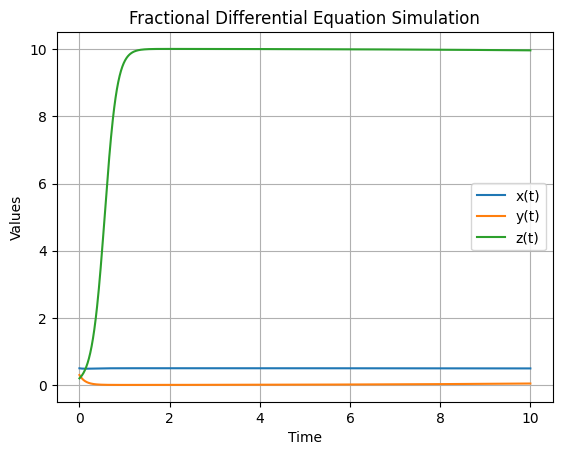

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 5.59422
k = 0.50232
q = 0.86130
D = 0.05338
c = 7.5160
A = 7.1992
a = 0.71876
alpha = 0.5  # Order of fractional derivative

# System of fractional differential equations
def system(t, u):
    x, y, z = u
    dxdt = r * x * (1 - x / k) - (q * x * y / (x + D))
    dydt = -c * y + (q * x * y * z) / (x + D)
    dzdt = A * z - a * z ** 2 - (q * x * y * z) / (x + D)
    return [dxdt, dydt, dzdt]

# Time settings
t_start = 0
t_end = 10
num_points = 1000
t_values = np.linspace(t_start, t_end, num_points)
h = t_values[1] - t_values[0]

# Initial conditions
u0 = [0.5, 0.3, 0.2]

# Initialize arrays to store solutions
x_values = np.zeros(num_points)
y_values = np.zeros(num_points)
z_values = np.zeros(num_points)

x_values[0], y_values[0], z_values[0] = u0

# Simulate the system using fractional difference approximation
for i in range(1, num_points):
    t = t_values[i]
    x_values[i] = x_values[i - 1] + h * (r * x_values[i - 1] * (1 - x_values[i - 1] / k) - (q * x_values[i - 1] * y_values[i - 1] / (x_values[i - 1] + D)))
    y_values[i] = y_values[i - 1] + h * (-c * y_values[i - 1] + (q * x_values[i - 1] * y_values[i - 1] * z_values[i - 1]) / (x_values[i - 1] + D))
    z_values[i] = z_values[i - 1] + h * (A * z_values[i - 1] - a * z_values[i - 1] ** 2 - (q * x_values[i - 1] * y_values[i - 1] * z_values[i - 1]) / (x_values[i - 1] + D))

# Plot
plt.plot(t_values, x_values, label='x(t)')
plt.plot(t_values, y_values, label='y(t)')
plt.plot(t_values, z_values, label='z(t)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Fractional Differential Equation Simulation')
plt.legend()
plt.grid(True)
plt.show()
